In [1]:
import numpy as np
import pandas as pd
import umap
from matplotlib import pyplot as plt

#change the file path based on you file system
data_nontransfered = np.load("..\cache\\thingseeg2_preproc\\transfer\sub-01\\train_thingseeg2_3000avg_nontransfered_from2.npy")
data_transfered = np.load("..\cache\\thingseeg2_preproc\\transfer\sub-01\\train_thingseeg2_3000avg_transfered_from2.npy")
data = np.load("..\data\\thingseeg2_preproc\sub-01\preprocessed_eeg_training.npy", allow_pickle=True).item()
subject_one = data["preprocessed_eeg_data"][:, :, :, 20:101]
subject_one = np.mean(subject_one, 1)

c:\Users\qsyan\.conda\envs\cogs209\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(data_nontransfered.shape, data_transfered.shape, subject_one.shape)

(16540, 17, 80) (16540, 17, 80) (16540, 17, 80)


In [3]:
nontransfered = data_nontransfered[3000:].reshape(13540, 1360)
transfered = data_transfered[3000:].reshape(13540, 1360)
subject = subject_one[3000:].reshape(13540, 1360)
print(nontransfered.shape, transfered.shape, subject.shape)

(13540, 1360) (13540, 1360) (13540, 1360)


In [4]:
final_data = np.append(nontransfered, np.append(transfered, subject, 0), 0)
print(final_data.shape)

(40620, 1360)


In [5]:
# train umap and display
umap_func = umap.UMAP()
u = umap_func.fit_transform(final_data)

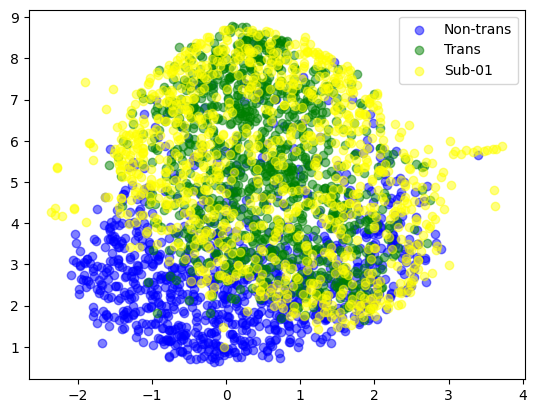

In [19]:
k = 100
labels = ['Non-trans', "Trans", "Sub-01"]
color = np.append(np.zeros(k*10), np.append(np.ones(k*10), np.ones(k*10)*2))
# u_to_diaplay = np.append(u[0:k*10], np.append(u[13540:13540+k*10], u[27080: 27080+k*10], 0), 0)
# color = np.append(np.zeros(k*10), np.ones(k*10))
# u_to_diaplay = np.append(u[0:k*10], u[13540:13540+k*10], 0)
plt.figure()
#plt.scatter(u_to_diaplay[:, 0], u_to_diaplay[:, 1], c=color, label=color, alpha=0.5)
plt.scatter(u[:k*10, 0], u[:k*10, 1], c="blue", label="Non-trans", alpha=0.5)
plt.scatter(u[13540:13540+k*10, 0], u[13540:13540+k*10, 1], c="green", label="Trans", alpha=0.5)
plt.scatter(u[27080:27080+k*10, 0], u[27080:27080+k*10, 1], c="yellow", label="Sub-01", alpha=0.5)
plt.legend()